# 시계열 분석 연습문제

## 문제 1

다음의 데이터는 1937년 07월 01일부터 2023년 08월 06일까지 서울의 평균 기온을 조사한 자료의 일부이다.

| 날짜         | 평균기온(℃) |
|------------|---------|
| 1973-07-01 | 22.7    |
| 1973-07-02 | 23.8    |
| 1973-07-03 | 27.2    |
| 1973-07-04 | 25.2    |
| 1973-07-05 | 26.9    |

전체 자료는 아래의 URL을 통해 내려받을 수 있다.

```plain
https://data.hossam.kr/E06/temperatures_seoul.xlsx
```

이 데이터를 활용하여 조사기간동안 서울의 평균기온이 어떻게 변화하고 있는지 ARIMA와 AUTO_ARIMA를 사용하여 분석하고 앞으로 1년간의 평균 기온을 시각화 하시오.

시각화 기간은 2023년 8월 6일을 기준으로 전후 1년간으로 한다.

In [1]:
import sys
sys.path.append("../../helper")
from AnalysisHelper import helper

from datetime import datetime as dt
from datetime import timedelta
from pandas import read_excel, to_datetime
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import seaborn as sb

In [2]:
df = read_excel("temperatures_seoul.xlsx",index_col='날짜')
df.head()

,평균기온(℃)
날짜,
1973-07-01,26.816129
1973-08-01,25.883871
1973-09-01,20.323333
1973-10-01,13.038710
1973-11-01,4.723333


In [3]:
df1 = read_excel("https://data.hossam.kr/E06/temperatures_seoul.xlsx",index_col='날짜')
df1.head()

,평균기온(℃)
날짜,
1973-07-01,22.7
1973-07-02,23.8
1973-07-03,27.2
1973-07-04,25.2
1973-07-05,26.9


In [4]:
df.rename(columns={'날짜':'date', '평균기온(℃)':'temp'}, inplace=True)
df.head()

,temp
날짜,
1973-07-01,26.816129
1973-08-01,25.883871
1973-09-01,20.323333
1973-10-01,13.038710
1973-11-01,4.723333


In [5]:
df.dtypes 

temp    float64
dtype: object

In [6]:
df.isna().sum()

temp    0
dtype: int64

In [7]:
df.tail()

,temp
날짜,
2023-04-01,13.800000
2023-05-01,19.522581
2023-06-01,23.383333
2023-07-01,26.706452
2023-08-01,29.866667


In [38]:
df2 = df['temp'].diff() # 차분
df2.dropna()

날짜
1973-10-01    2.904194
1973-11-01    0.693333
1973-12-01    1.645376
1974-01-01    7.605484
1974-02-01   -8.359969
                ...   
2023-04-01   -7.119355
2023-05-01    5.164516
2023-06-01   -3.565054
2023-07-01    1.324194
2023-08-01    0.374731
Name: temp, Length: 599, dtype: float64

In [39]:
# 원본파일 그대로 저장하기
df2.to_excel('1.xlsx')

In [40]:
df2.head()

날짜
1973-09-01         NaN
1973-10-01    2.904194
1973-11-01    0.693333
1973-12-01    1.645376
1974-01-01    7.605484
Name: temp, dtype: float64

In [41]:
df = read_excel("1.xlsx",index_col='날짜')
df.head()

,temp
날짜,
1973-09-01,NaN
1973-10-01,2.904194
1973-11-01,0.693333
1973-12-01,1.645376
1974-01-01,7.605484


In [42]:
df.dropna()

,temp
날짜,
1973-10-01,2.904194
1973-11-01,0.693333
1973-12-01,1.645376
1974-01-01,7.605484
1974-02-01,-8.359969
...,...
2023-04-01,-7.119355
2023-05-01,5.164516
2023-06-01,-3.565054


결측치 수: 1


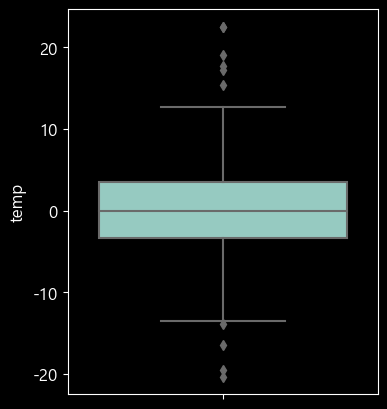

ValueError: This function does not handle missing values

In [43]:
helper.exp_time_data(data=df, yname='temp',sd_model='a')

검정통계량(ADF Statistic): -3.87741
ADF 통계량 값은 -3.87741로, 검정 결과 데이터의 정상성을 판단하는데 사용됩니다. 이 값이 임계값보다 낮으면 데이터가 정상성을 가지는 것으로 간주될 수 있습니다.
유의수준(p-value): 0.00220755
유의수준은 0.00220755로, 유의수준 0.05보다 작습니다. 이는 귀무가설을 기각하고 대립가설을 받아들일 충분한 근거가 됩니다. 즉, 데이터가 정상성을 가지지 않는다는 귀무가설을 기각하고, 정상성을 가진다는 대립가설을 채택할 수 있습니다.
최적차수(num of lags): 14
최적의 시차(lag) 수는 14로 결정되었습니다.
관측치 개수(num of observations): 587
분석에 사용된 관측치의 총 개수입니다.
기각값(Critical Values) 1%, 5%, 10%:
각 유의수준에 대한 기각값이 제공되었습니다. ADF 통계량 값이 이 기각값보다 낮으면 데이터가 정상성을 가진다고 볼 수 있습니다.
데이터 정상성 여부(0=Flase,1=True): 1
ADF 검정 결과에 따르면 데이터가 정상성을 가진다고 판단되었습니다.

In [44]:
model = ARIMA(df['temp'],order=(2,0,0),seasonal_order=(2,0,0,12))
fit = model.fit()
print(fit.summary())

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                             temp   No. Observations:                  600
Model:             ARIMA(2, 0, 0)x(2, 0, 0, 12)   Log Likelihood               -1584.354
Date:                          Mon, 07 Aug 2023   AIC                           3180.709
Time:                                  16:17:54   BIC                           3207.090
Sample:                              09-01-1973   HQIC                          3190.979
                                   - 08-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.232      0.029      0.977      -0.447       0.461
ar.L1         -1.1141      0.032    -34.636      0.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


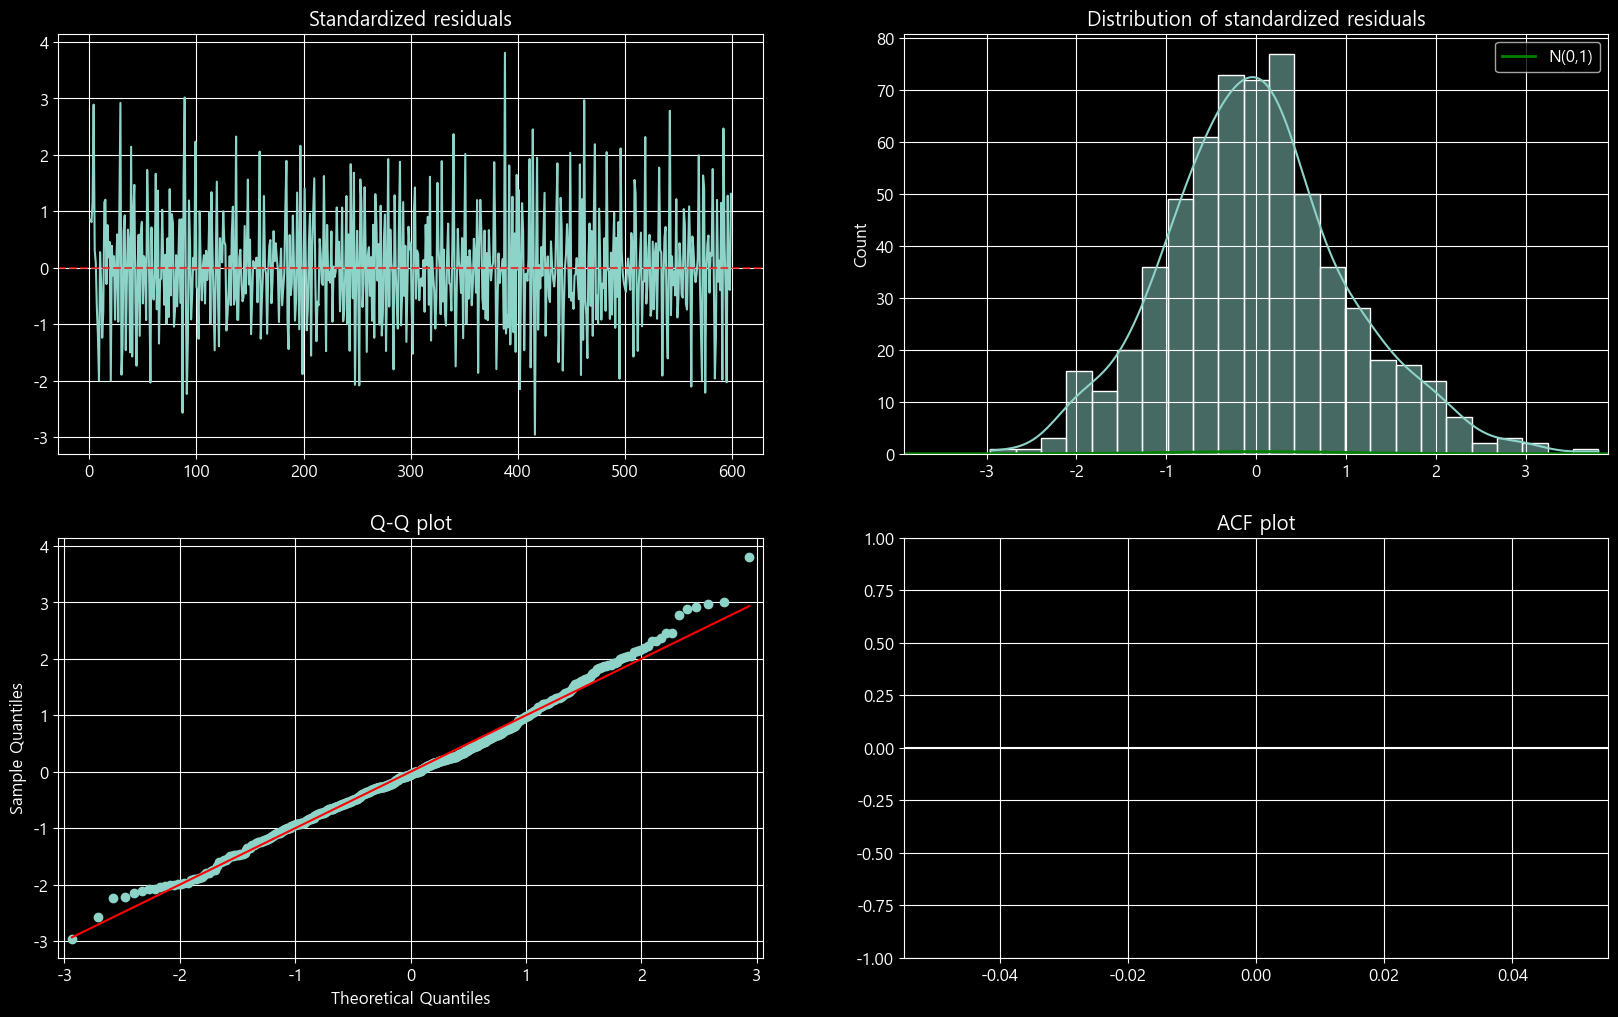

In [45]:
# 잔차분석
helper.arima_diagnostics(fit.resid)

In [46]:
fv = fit.fittedvalues
fv.head()


날짜
1973-09-01    0.006692
1973-10-01    0.006692
1973-11-01   -2.069688
1973-12-01   -2.312604
1974-01-01   -2.255157
dtype: float64

In [47]:
fc = fit.forecast(30)
fc.head()

2023-09-01    -3.316862
2023-10-01     3.110879
2023-11-01     2.746220
2023-12-01    -5.712389
2024-01-01    13.151398
Freq: MS, Name: predicted_mean, dtype: float64

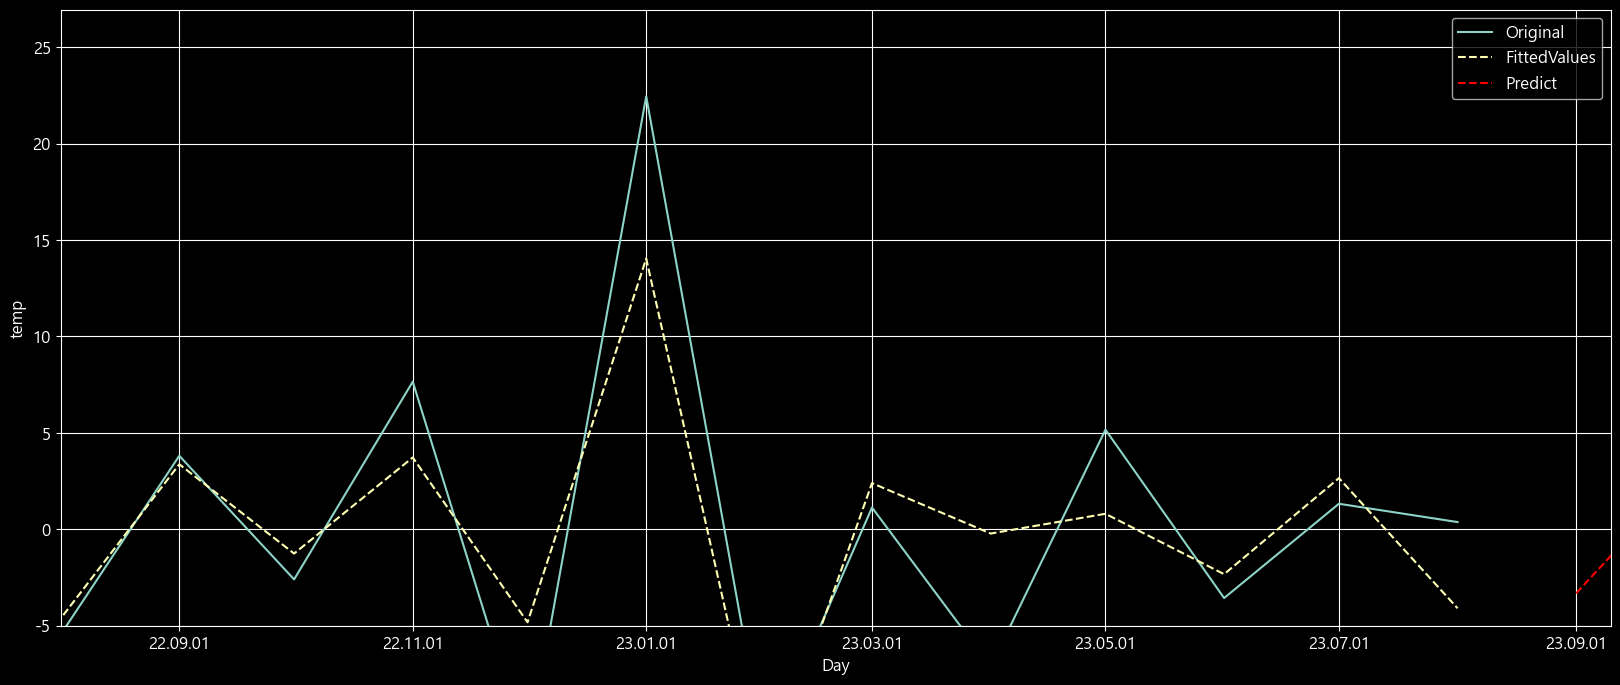

In [48]:
plt.figure(figsize=(20,8))

# 원본 데이터
sb.lineplot(data=df, x=df.index, y='temp', label='Original')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

# 뒤 30% + 10단계에 대한 예측 데이터
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('Day')
plt.ylabel('temp')
plt.legend()

last = df.index.max()
xmin = last-timedelta(days=365)
xmax = last+timedelta(days=30+10)
ymax = df['temp'][xmin:xmax].max()

plt.xlim([xmin, xmax])
plt.ylim([-5, ymax*1.2])

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()

In [28]:
my_p = 4    # AR의 차수 (검증한 결과를 활용)
my_d = 0    # 차분 횟수 (검증한 결과를 활용)
my_q = 0    # MA의 차수 (검증한 결과를 활용)
my_s = 12    # 계절성 주기 (분석가가 판단)

model = auto_arima(
    y=df['temp'],  # 모델링하려는 시계열 데이터 또는 배열
    start_p=0,           # p의 시작점
    max_p=my_p,          # p의 최대값
    d=my_d,              # 차분 횟수
    start_q=0,           # q의 시작점
    max_q=my_q,          # q의 최대값
    seasonal=True,       # 계절성 사용 여부
    m=my_s,              # 계절성 주기
    start_P=0,           # P의 시작점
    max_P=my_p,          # P의 최대값
    D=my_d,              # 계절성 차분 횟수
    start_Q=0,           # Q의 시작점
    max_Q=my_q,          # Q의 최대값
    trace=True           # 학습 과정 표시 여부
)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3363.837, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3022.245, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3361.839, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3361.966, Time=0.07 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=3204.159, Time=0.16 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,0,0)(1,0,0)[12]             : AIC=3020.255, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=3359.967, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(1,0,0)[12]             : AIC=3202.164, Time=0.08 sec
 ARIMA(2,0,0)(1,0,0)[12]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(1,0,0)(1,0,0)[12]          
Total fit time: 2.848 seconds
                                     SARIMAX Results                                      
Dep.

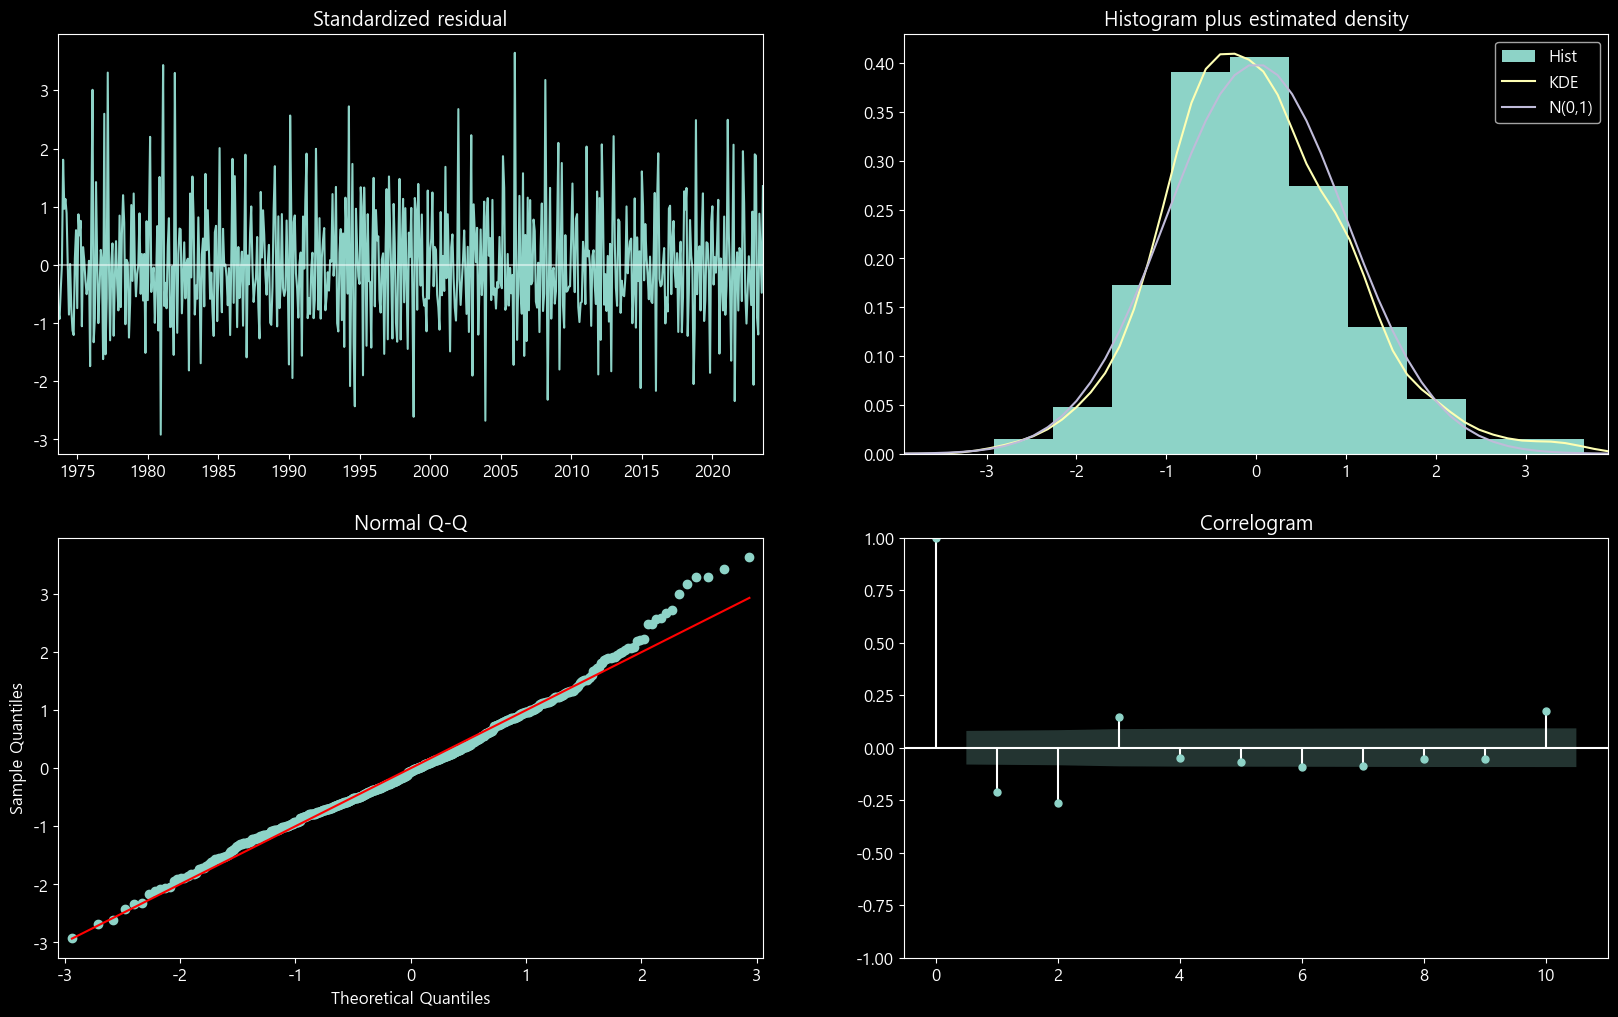

In [29]:
model.plot_diagnostics(figsize=(20,12))
plt.show()
plt.close()

In [30]:
fv = model.fittedvalues()
fv.head()

날짜
1973-09-01    0.000000
1973-10-01    2.702086
1973-11-01    0.993426
1973-12-01    0.618881
1974-01-01   -0.389764
dtype: float64

In [31]:
fc = model.predict(n_period=30)
fc.head()

2023-09-01    -3.884164
2023-10-01    -2.013879
2023-11-01     1.715504
2023-12-01    -6.033959
2024-01-01    10.811107
Freq: MS, dtype: float64

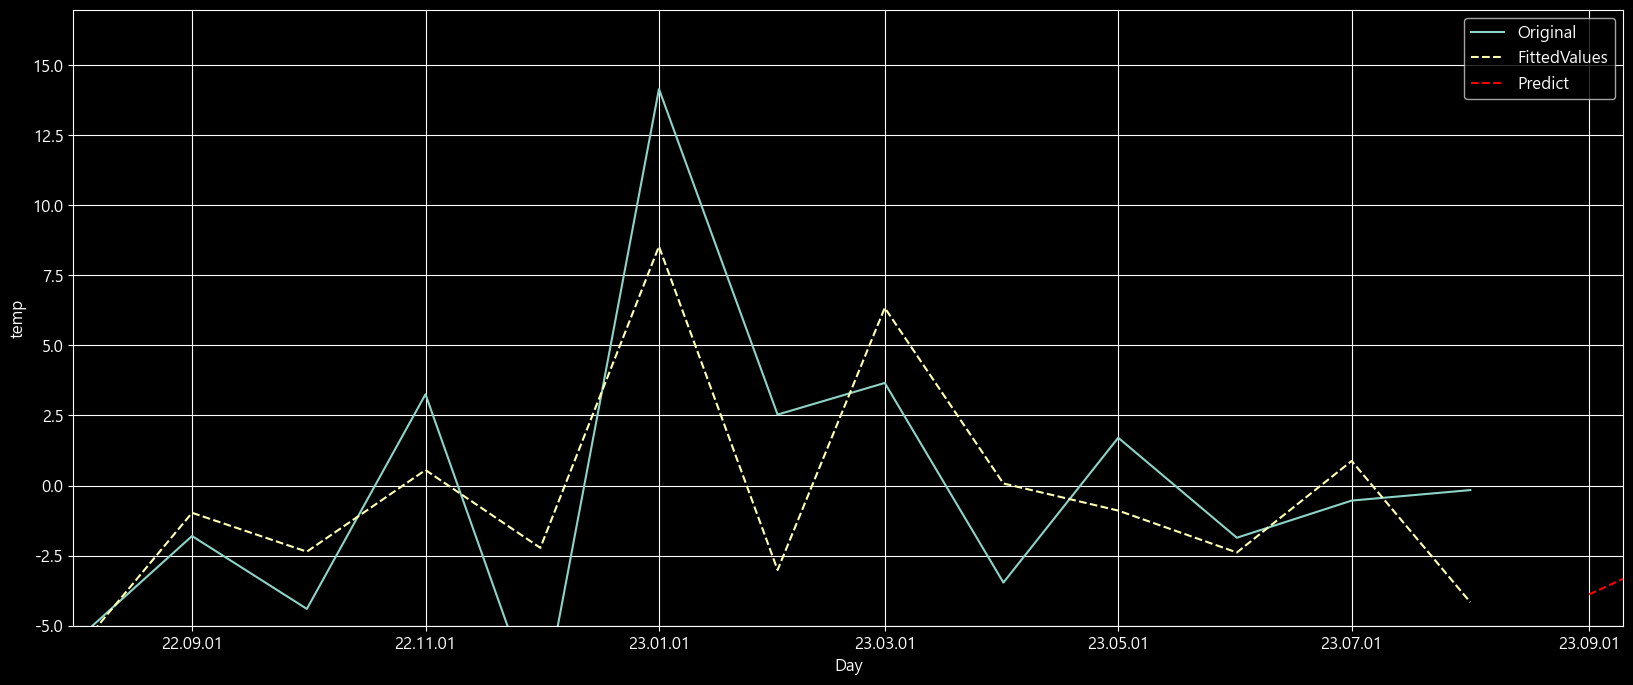

In [32]:
plt.figure(figsize=(20,8))

# 원본 데이터
sb.lineplot(data=df, x=df.index, y='temp', label='Original')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

# 뒤 30% + 10단계에 대한 예측 데이터
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('Day')
plt.ylabel('temp')
plt.legend()

last = df.index.max()
xmin = last-timedelta(days=365)
xmax = last+timedelta(days=30+10)
ymax = df['temp'][xmin:xmax].max()

plt.xlim([xmin, xmax])
plt.ylim([-5, ymax*1.2])

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()